# Motivation

This endeavor is rooted in the research paper titled [Hybrid Method in Identifying Fraud Detection in Credit Cards](https://www.springerprofessional.de/en/hybrid-method-in-identifying-the-fraud-detection-in-the-credit-c/18238758). 
The authors include P. Tiwari, S. Mehta, N. Sakhuja, I. Gupta, and A. K. Singh from the Department of Computer Applications at the National Institute of Technology, Kurukshetra, India.

The study investigated contemporary fraud detection techniques, revealing their inadequacy in detecting fraud promptly. Previous methods demonstrated accuracy primarily on specific datasets or features. Notably, SVM outperformed Logistic Regression in handling class imbalance, while Random Forest excelled among the two. The Bagging Ensemble Classifier proved effective for highly imbalanced datasets. Decision Trees and SVM performed well on raw, unsampled data, whereas ANN and Bayesian Belief Network achieved high accuracy and detection rates at the cost of intensive training. Similarly, SVM and KNN excelled with small datasets but were less suitable for larger ones. The proposed technology aims for consistent precision and accuracy across diverse scenarios and datasets by amalgamating existing techniques.

The paper introduced a model centered on average accuracy, combining K-nearest neighbor, neural networks, and decision trees for credit card fraud detection. The model assigns a new label through majority voting for each incoming transaction. As depicted in the accompanying image, the model is designed to be effective across various dataset sizes and types. Displaying substantial accuracy improvements, this fraud detection model overcomes individual model limitations, highlighting its significant practicality.
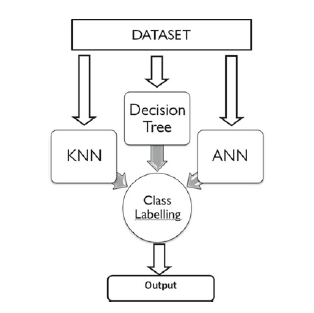
According to the paper, the model is designed to perform effectively across various dataset sizes and types. Demonstrating substantial improvements in accuracy, this fraud detection model surpasses the limitations of individual models, signifying its significant utility.

# Dataset

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. The dataset was made available in Kaggle - https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# 1. Set up

In [4]:
# pip install numpy pandas scikit-learn scipy matplotlib plotly seaborn hyperopt

### 1.1 Import Libraries

In [188]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, average_precision_score, precision_score, recall_score, accuracy_score
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import StratifiedShuffleSplit
rcParams['figure.figsize'] = 12, 8

In [106]:
from sklearn import metrics
# from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, average_precision_score, precision_score, recall_score, accuracy_score

In [107]:
import sys  
import time
sys.path.insert(1, 'Credit_Card_Fraud_Detection')
import plot_functions
import scaler
import outlier_detection
from datetime import timedelta

### 1.2 Import Data

In [108]:
data = pd.read_csv("creditcard.csv")

### 1.3 Data set characteristics

In [109]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 2. Data Preprocessing

### 2.1 Checking null or nan values

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### 2.2 Dropping duplicate rows

In [111]:
# Count the number of duplicate rows
num_duplicates = data.duplicated().sum()

# Print the number of duplicate rows
if num_duplicates > 0:
    print(f"Number of duplicate rows: {num_duplicates}")
else:
    print("No duplicate rows found.")

Number of duplicate rows: 1081


In [112]:
# Drop duplicate row
df = data.copy()
data.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")

Duplicated values dropped succesfully


### 2.3 Scaling 

The data description specifies that all features underwent a PCA transformation, a Dimensionality Reduction technique, with the exception of 'time' and 'Amount'. It can be inferred that the PCA-transformed features have been scaled beforehand, except for 'time' and 'Amount'.

Before deciding to scale, lets just look at the data

In [113]:
## Get the fraud and the genuine dataset 
fraud = data[data['Class']==1]
genuine = data[data['Class']==0]

In [114]:
max(data[data['Class']==0]['Amount'])

25691.16

In [115]:
max(data[data['Class']==1]['Amount'])

2125.87

Text(0, 0.5, 'Number of Transactions')

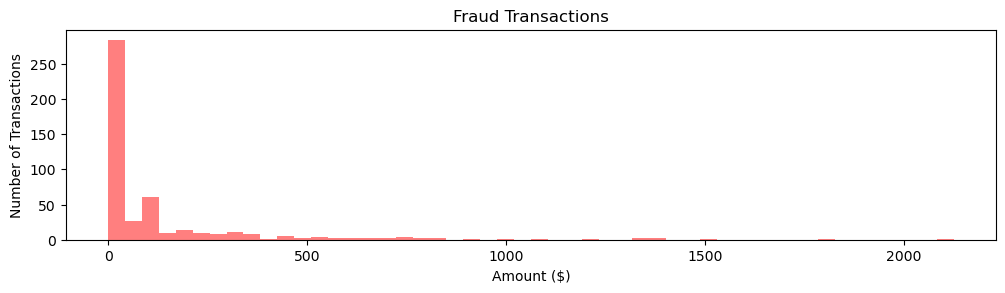

In [116]:
# Plotting Fraud transactions
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.hist(fraud.Amount, bins=50, color='red', alpha=0.5)
plt.title('Fraud Transactions')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')

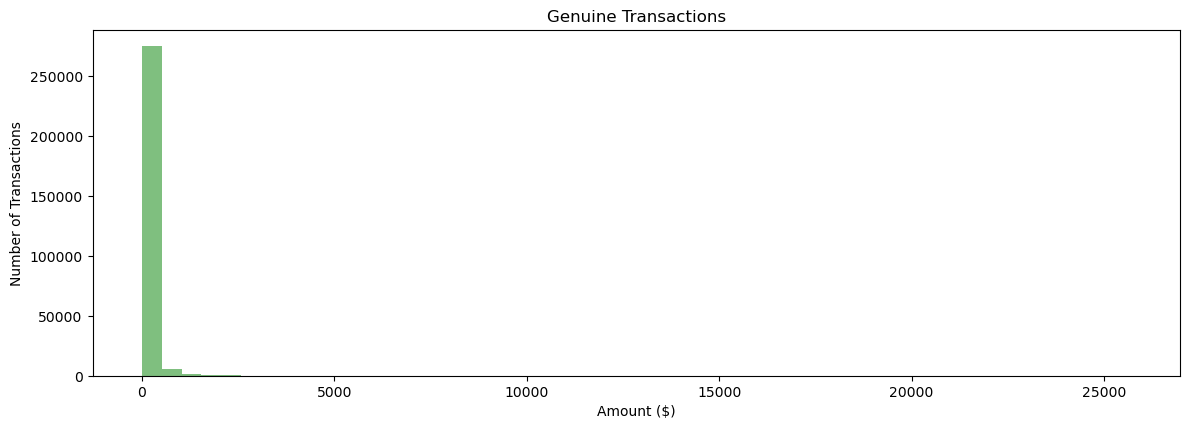

In [117]:
# Plotting Genuine transactions
plt.subplot(2, 1, 2)
plt.hist(genuine.Amount, bins=50, color='green', alpha=0.5)
plt.title('Genuine Transactions')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

Both fraudulent and genuine transactions tend to have higher frequencies for lower amounts, which is a common pattern.
Also, as visible, its common for fraudulent transactions to involve smaller amounts, possibly as an attempt to avoid detection.
While the amount alone may not be a distinguishing feature, combining it with other relevant features in your dataset might reveal more meaningful patterns. Lets go ahead and scale it.

In [118]:
from sklearn.preprocessing import MinMaxScaler
df['Scaled_Amount'] = MinMaxScaler().fit_transform(
df['Amount'].values.reshape(-1,1))
df= df.drop(['Amount'], axis = 1)
print(f"Few values of Amount column after applying StandardScaler:- \n{df['Scaled_Amount'][0:4]}")

Few values of Amount column after applying StandardScaler:- 
0    0.005824
1    0.000105
2    0.014739
3    0.004807
Name: Scaled_Amount, dtype: float64


In [119]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'Scaled_Amount'],
      dtype='object')

### 2.5 Outlier Detection

In [120]:
numeric_columns=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Scaled_Amount']

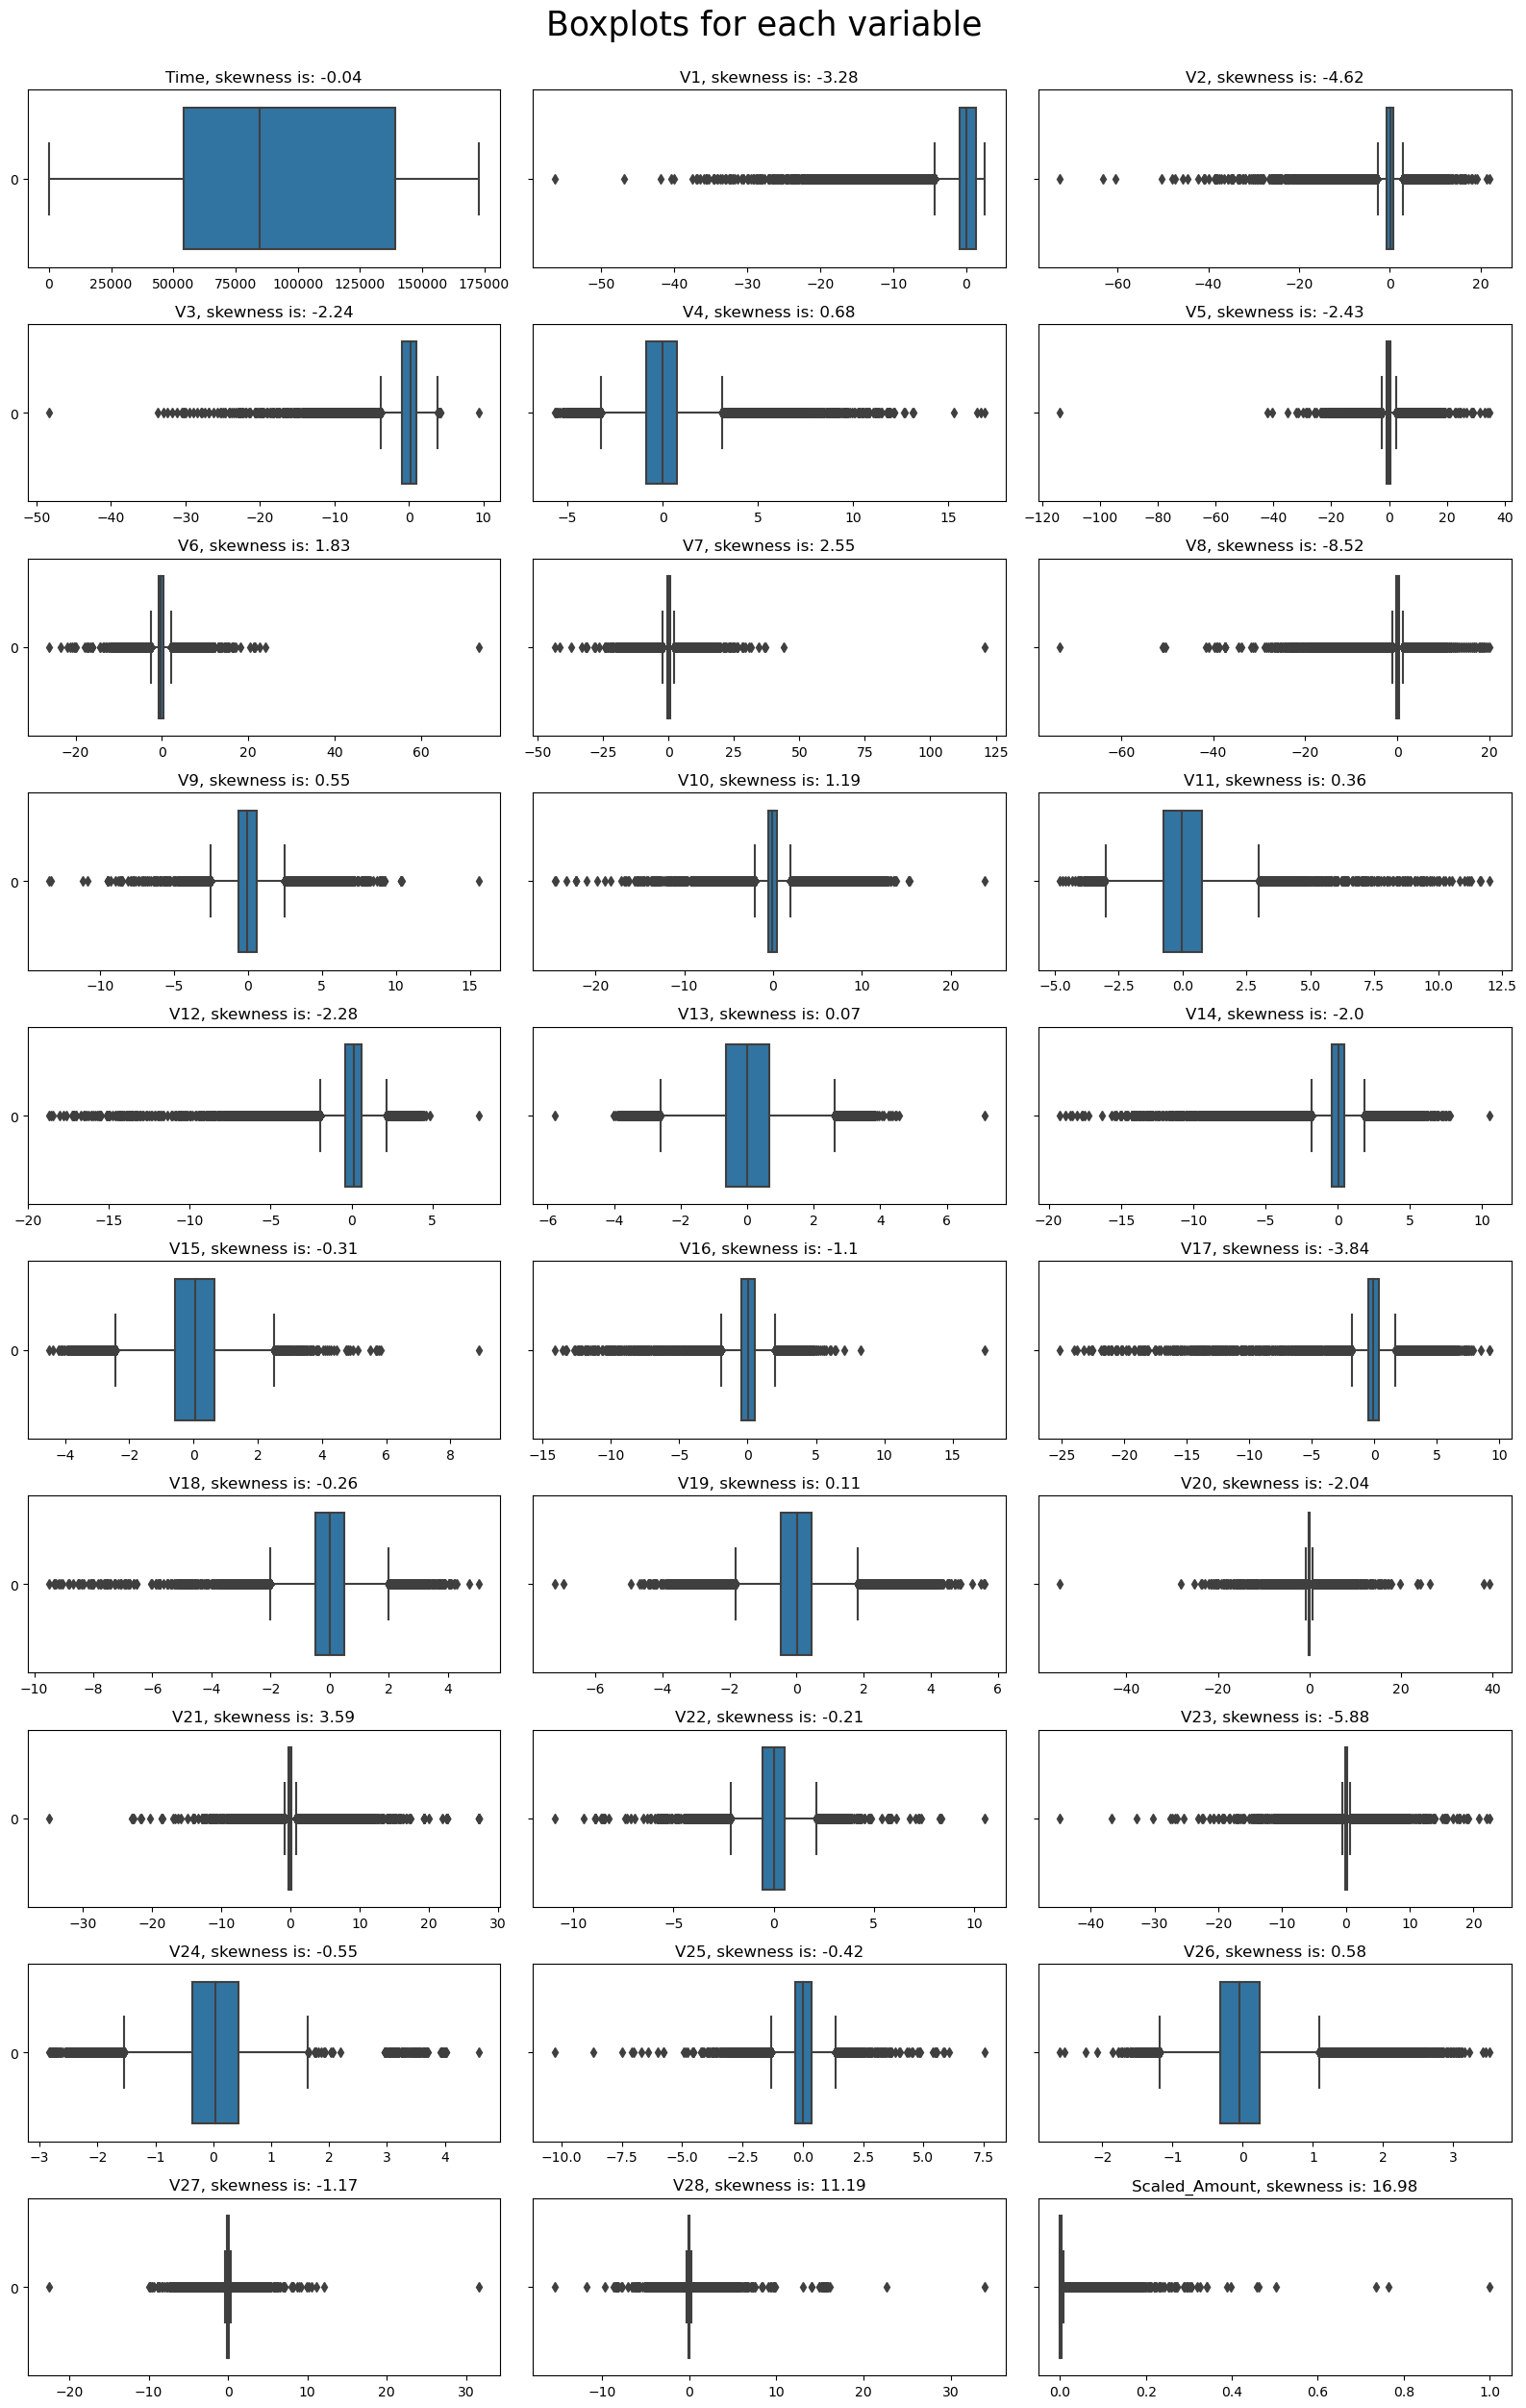

In [121]:
# Checking for Outliers
# checking boxplots
from plot_functions import *        
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=10, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

#### Scatter plot shows presence of some outlier. Lets see what happens when we get rid of them

In [122]:
# Lets detect outliers using Turkey IQR Method
from outlier_detection import IQR_method

# detecting outliers
Outliers_IQR = IQR_method(df,0,numeric_columns)

# # dropping outliers
df_out = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of outliers is: 31904


In [123]:
# Let's check if we didn't drop too many important information accidentally for minority class
print ('The amount of frauds in df before dropping outliers: ', len(df[df['Class'] == 1]))
print ('The amount of frauds in df afret dropping outliers: ', len(df_out[df_out['Class'] == 1]))

The amount of frauds in df before dropping outliers:  492
The amount of frauds in df afret dropping outliers:  15


It looks like outliers are very similar to fraud values and we dropped most of them!
This hints that it might be a good case for Isolation Forest Algorithm or Local Outlier Factor(LOF) Algorithm as well.
For now, move ahead with our original df without dropping outliers

# 3. Exploratory Data Analysis

In [124]:
labels=["Genuine","Fraud"]

fraud_or_not = df["Class"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=df['Class'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["green","red"]
             ,title="Fraud vs Genuine transactions")
fig.show()

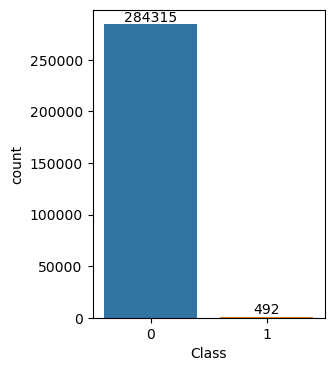

In [125]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Class',data=df)
for i in ax.containers:
    ax.bar_label(i,)

### Case of Highly Imbalanced Data 
In this dataset, if you choose accuracy as your metrics :
* we have **99,8%** of Genuine transactions and only **0,173%** (492) of fraud transactions;
* whis means that a blind guess (any Naive Model) would give us accuracy of **99,8%**

Given the class imbalance ratio,the Area Under the Precision-Recall Curve (AUPRC) is the most suitable metric.

In [126]:
## Get the fraud and the genuine dataset 
fraud = df[df['Class']==1]
genuine = df[df['Class']==0]

The plot shows a pattern in the time distribution of fraudulent and genuine transactions. Fraudulent transactions tend to have higher time values compared to genuine transactions, indicating a noticeable pattern.

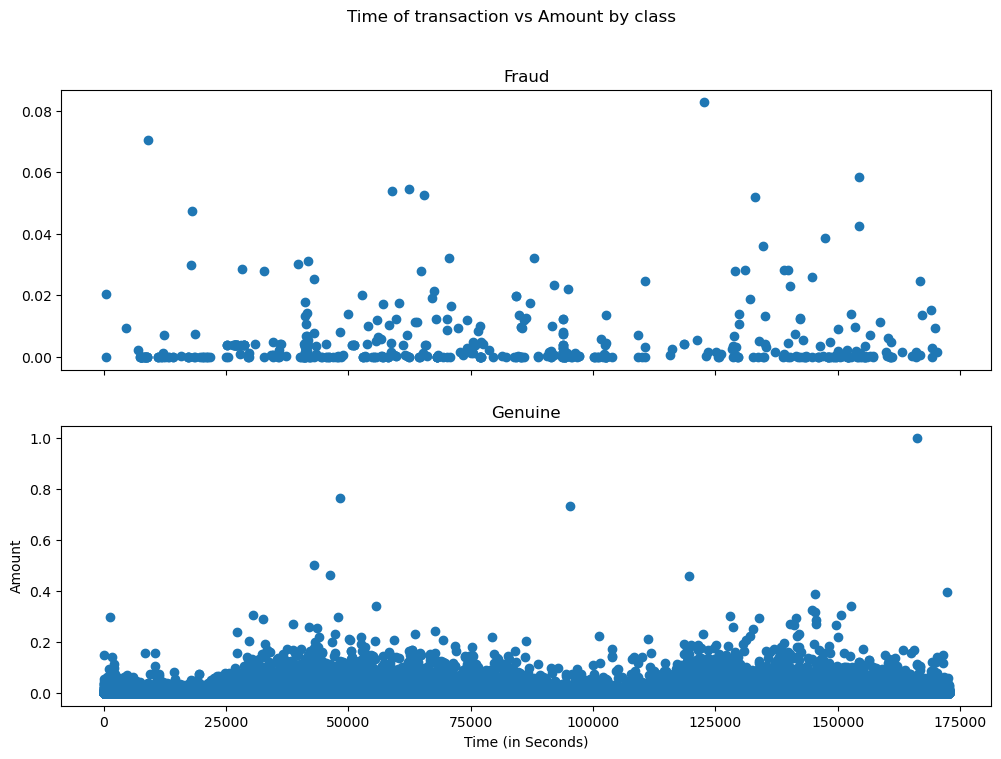

In [127]:
# We want to check if there is any pattern in relationship between time and amount of transaction
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Scaled_Amount)
ax1.set_title('Fraud')
ax2.scatter(genuine.Time, genuine.Scaled_Amount)
ax2.set_title('Genuine')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

Scaling Time Column

In [128]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'Scaled_Amount'],
      dtype='object')

In [129]:
df['Scaled_time'] = MinMaxScaler().fit_transform(
df['Time'].values.reshape(-1,1))
df= df.drop(['Time'], axis = 1)
print(f"Few values of Amount column after applying StandardScaler:- \n{df['Scaled_time'][0:4]}")

Few values of Amount column after applying StandardScaler:- 
0    0.000000
1    0.000000
2    0.000006
3    0.000006
Name: Scaled_time, dtype: float64


In [130]:
numeric_columns=['Scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Scaled_Amount']

In [131]:
# Set the color map to 'YlOrRd' for a yellow to red gradient
cmap = sns.color_palette("YlOrRd", as_cmap=True)

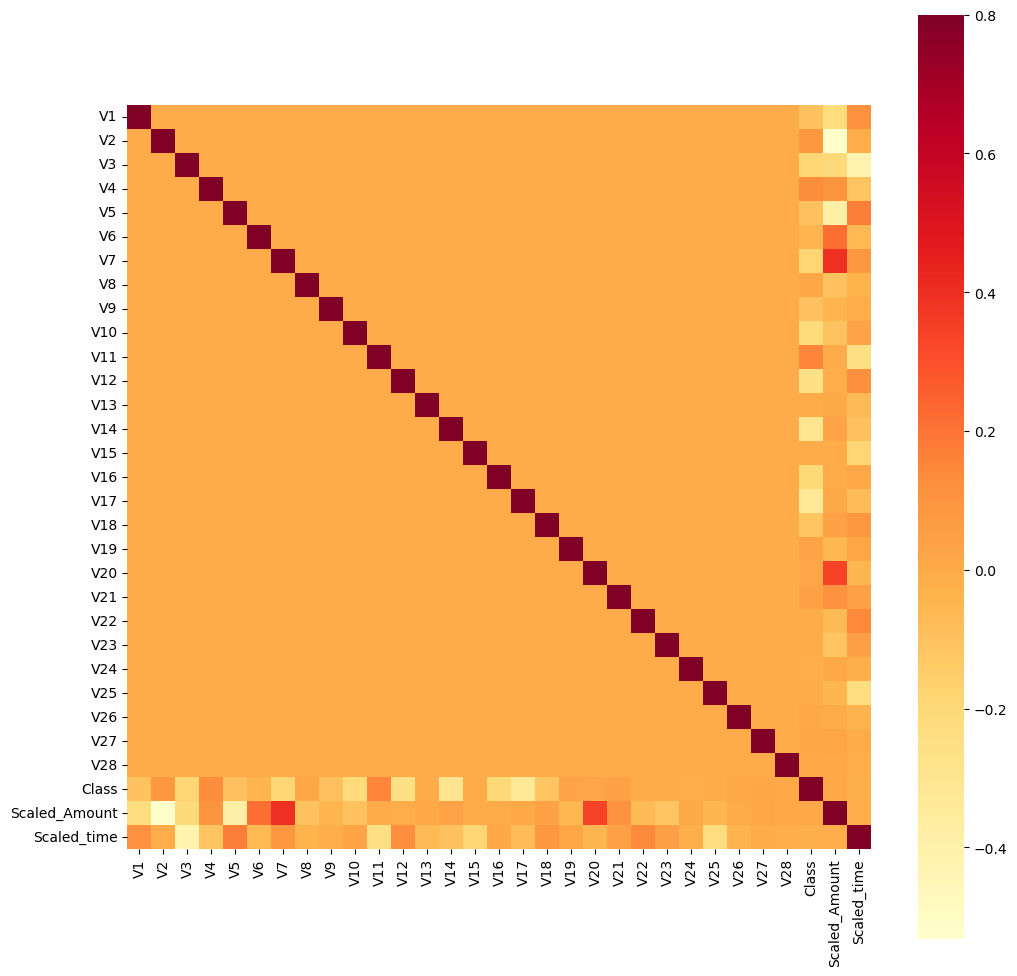

In [132]:
corrmat = df.corr()
fig = plt.figure(figsize = (12, 12))

sns.heatmap(corrmat,cmap=cmap, vmax = 0.8, square = True)
plt.show()

In [133]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'Scaled_Amount', 'Scaled_time'],
      dtype='object')

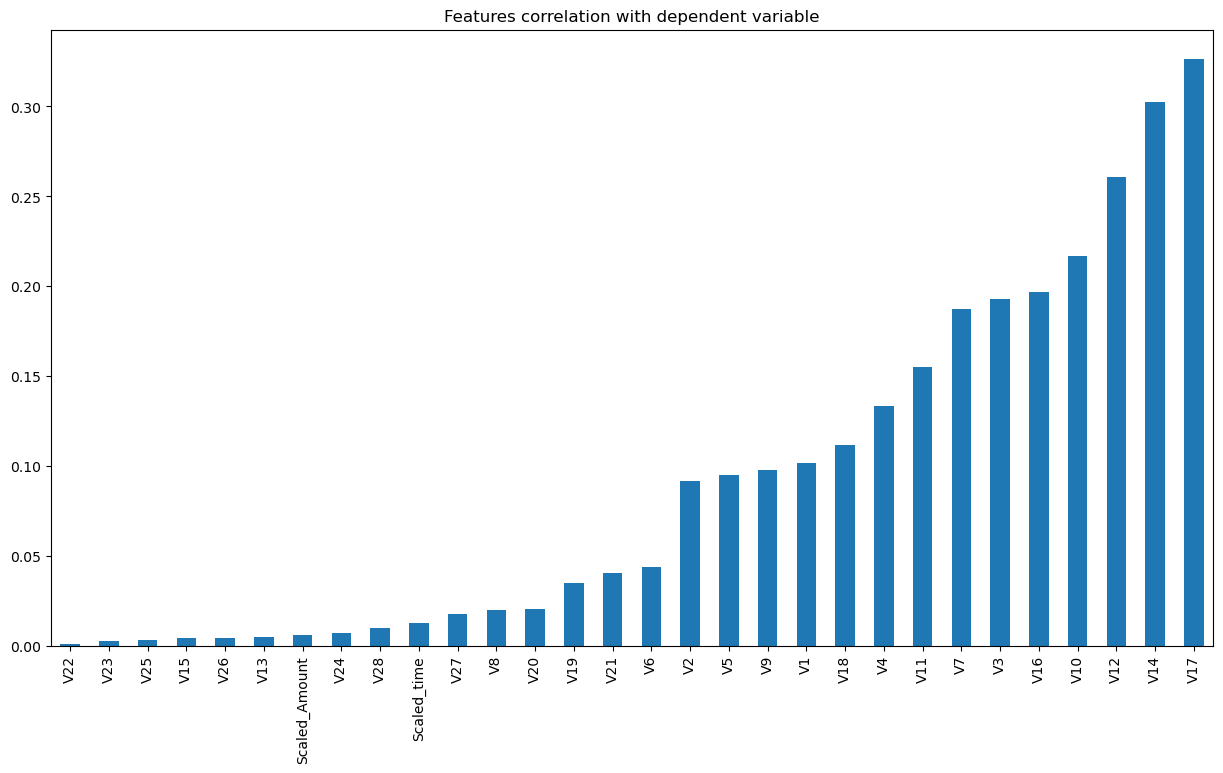

In [134]:
# correlation with dependent variable
plt.figure(figsize=(15,8))
d = df.corr()['Class'][numeric_columns].abs().sort_values().plot(kind='bar', title='Features correlation with dependent variable')
plt.show()

Let's plot some jointplot to visually assess the relationship between variables

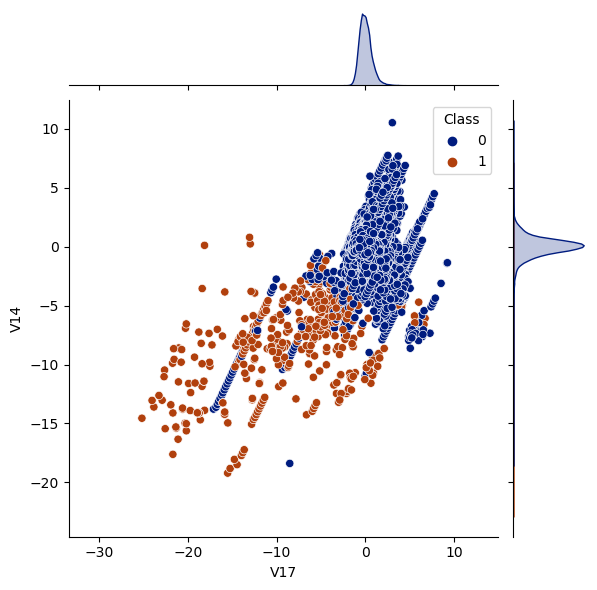

In [135]:
sns.jointplot(x='V17', y='V14',hue='Class', data=df, palette = 'dark')

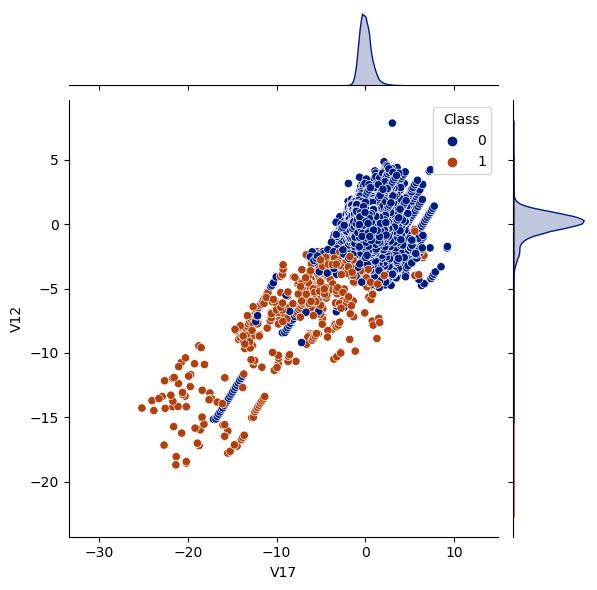

In [136]:
sns.jointplot(x='V17', y='V12',hue='Class', data=df, palette = 'dark')

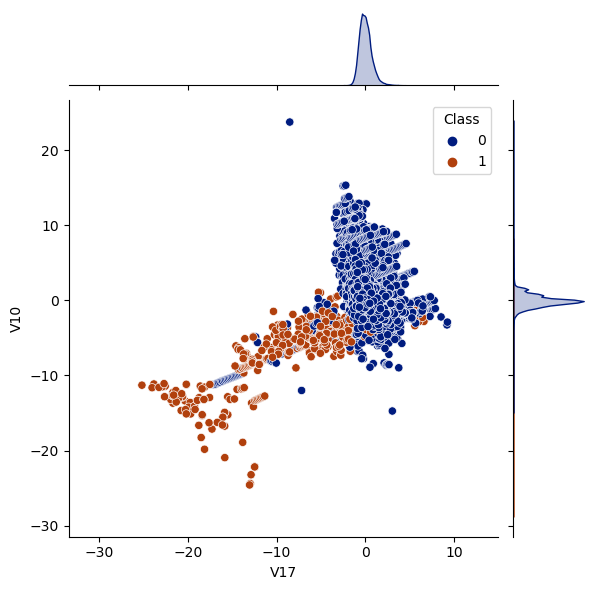

In [137]:
sns.jointplot(x='V17', y='V10',hue='Class', data=df, palette = 'dark')

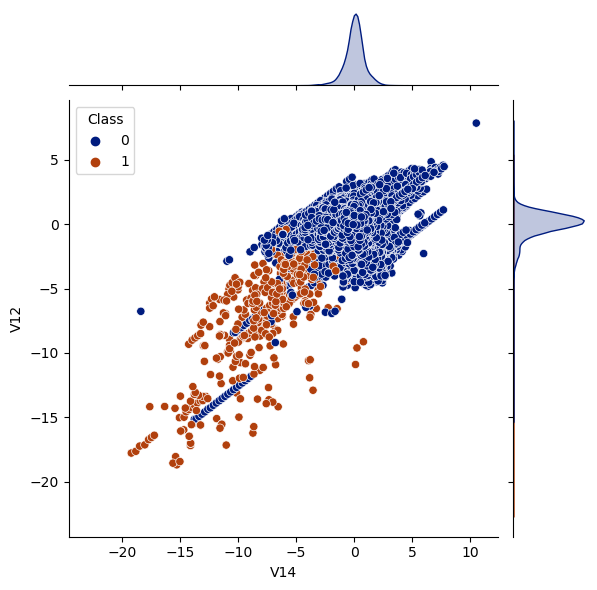

In [138]:
sns.jointplot(x='V14', y='V12',hue='Class', data=df, palette = 'dark')

The above features warrants some potetntial relationships

# 4. Splitting the dataset

In [139]:
X = df.drop(['Class'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(227845, 30)
(56962, 30)
(227845,)
(56962,)


# 5. Random Forest Classifier

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
# initialize object for RandomForestClassifier class
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
print("Model training start........")
rf_classifier.fit(X_train, y_train) 

Model training start........


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [142]:
# predict result using test dataset
y_pred1 = rf_classifier.predict(X_test)

In [143]:
LABELS = ['Genuine', 'Fraud']

In [144]:
from plot_functions import plot_confusion_matrix

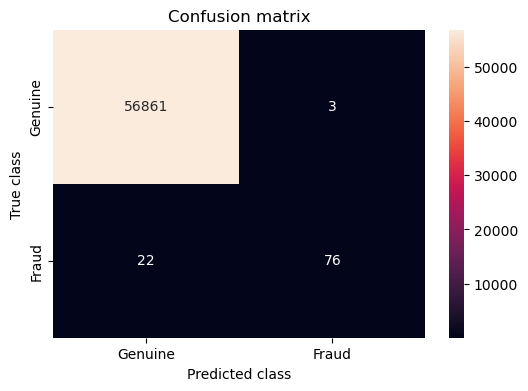

In [145]:
 plot_confusion_matrix(y_true=y_test, y_pred=y_pred1, labels=LABELS)

In [146]:
print('AUPRC score: {}'. format(metrics.average_precision_score(y_test, y_pred1)))
print('AUROC score: {}'.format(metrics.roc_auc_score(y_test, y_pred1)))
print('Accuracy score: {}'.format(metrics.accuracy_score(y_test, y_pred1)))
print(metrics.classification_report(y_test, y_pred1))

AUPRC score: 0.7464466718901308
AUROC score: 0.8877287233126226
Accuracy score: 0.9995611109160493
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



# 6. KNN

In [147]:
from sklearn.neighbors import KNeighborsClassifier

In [148]:
# initialize object for KNeighborsClassifier class
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [149]:
# predict result using test dataset
'''Be patient here, KNN classifier is a slow learner.
It doesn't build a model during training time. 
Instead, it stores the entire training set in memory and uses it to make predictions at runtime. 
This can be slow for large datasets.
Further it depends upon parameters, for Manhattan distance (i.e., p=1) it is slower. 
Also you are using a large number of neighbors, the algorithm will have to compare the new data point to all of the training data points in order to find the nearest neighbors. 
'''

y_pred2 = knn_classifier.predict(X_test)

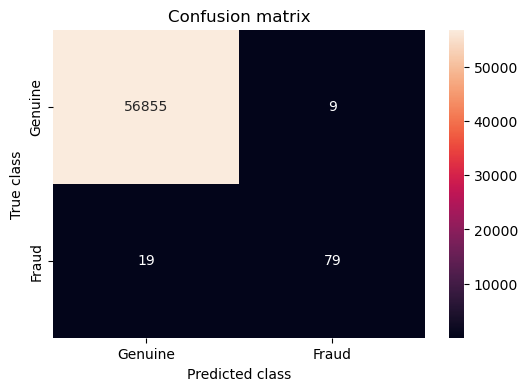

In [150]:
# confusion matrix
plot_confusion_matrix(y_true=y_test, y_pred=y_pred2, labels=LABELS)

In [151]:
print('AUPRC score: {}'. format(metrics.average_precision_score(y_test, y_pred2)))
print('AUROC score: {}'.format(metrics.roc_auc_score(y_test, y_pred2)))
print('Accuracy score: {}'.format(metrics.accuracy_score(y_test, y_pred2)))
print(metrics.classification_report(y_test, y_pred2))

AUPRC score: 0.7240116633104816
AUROC score: 0.9029820883052152
Accuracy score: 0.9995084442259752
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.81      0.85        98

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962



# DNN

In [152]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [154]:
# The function, create_data_loaders, is designed to create PyTorch DataLoader instances from your input data X and target variable y
def create_data_loaders(X, y, batch_size=32):
    # Convert X and y to NumPy arrays
    X_np = X.to_numpy()
    
    try:
        y_np = y.to_numpy()
    except :
        y_np=y

    # Convert X and y to PyTorch tensors
    X_tensor = torch.tensor(X_np).float()
    y_tensor = torch.tensor(y_np).float().view(-1, 1)  # Assuming y is a column vector

    # Create a TensorDataset
    dataset = TensorDataset(X_tensor, y_tensor)

    # Create DataLoader instances
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    return data_loader

In [155]:
# Architecture of NN model
class Classifier(nn.Module):
    def __init__(self, n_input=10, n_hidden = 20, n_output =1,drop_prob=0.2):
        super().__init__()
        self.extractor1 = nn.Linear(n_input, n_hidden) 
        self.extractor2 = nn.Linear(n_hidden, n_hidden)
        self.relu = nn.ReLU()
        self.drop_out = nn.Dropout(drop_prob)
        self.classifier = nn.Linear(n_hidden, n_output)

    def forward(self, xb):
        x = self.relu(self.extractor1(xb))
        x = self.relu(self.extractor2(x))
        x = self.drop_out(x)
        return self.classifier(x).squeeze()

In [156]:
def loss_batch(model, loss_func, xb, yb, opt=None):
    # Squeeze the target tensor to remove the extra dimension
    yb_squeezed = torch.squeeze(yb)
    
    # Calculate the loss
    # Apply sigmoid activation to model output
    model_output = torch.sigmoid(model(xb))
    loss = loss_func(model_output, yb_squeezed)
#     loss = loss_func(model(xb), yb_squeezed)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)

In [158]:
import torch
import torch.nn as nn
import numpy as np


class NeuralNetworkClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, model, epochs, loss_func, opt, metric=average_precision_score):
        self.model = model
        self.epochs = epochs
        self.loss_func = loss_func
        self.opt = opt
        self.metric = metric

    def fit(self, X, y):
        # For imbalanced dataset we need to use  stratified split
        X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
            
        # Convert data to PyTorch tensors
        train_dl = create_data_loaders(X_train, y_train)  # Implement create_data_loaders based on your data
        valid_dl = create_data_loaders(X_valid, y_valid)
        train_losses = []
        valid_losses = []
        score_values = []

        for epoch in range(self.epochs):
            self.model.train()
            for xb, yb in train_dl:
                loss, _ = loss_batch(self.model, self.loss_func, xb, yb, self.opt)

            self.model.eval()
            with torch.no_grad():
                losses, nums = zip(
                    *[loss_batch(self.model, self.loss_func, xb, yb) for xb, yb in valid_dl]
                )
            val_loss = np.sum(np.multiply(losses, nums))/np.sum(nums)
              
            # Calculate AUPRC
            y_true, y_scores = [], []
            for xb, yb in valid_dl:
                self.model.eval()
                with torch.no_grad():
                    outputs = self.model(xb)
                y_true.extend(yb.cpu().numpy())

                # If outputs is a scalar value
                if torch.is_tensor(outputs) and outputs.dim() == 0:
                    y_scores.extend([torch.sigmoid(outputs).cpu().item()])
                else:
                    y_scores.extend(torch.sigmoid(outputs).cpu().numpy())

                
            score = self.metric(y_true, y_scores)
            score_values.append(score)

            # Store losses
            train_losses.append(loss)
            valid_losses.append(val_loss)
            
               # The codes below are to study the change in loss function and metric with each epoch.

            print(f'Epoch [{epoch}/{self.epochs}], Validation Loss: {val_loss:.4f}, AUPRC : {score:.4f}')

        # Plotting
        plt.figure(figsize=(12, 5))

        # Plot Loss
        plt.subplot(1, 2, 1)
        plt.plot(range(1, self.epochs + 1), train_losses, label='Training Loss')
        plt.plot(range(1, self.epochs + 1), valid_losses, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss')
        plt.legend()

        # Plot AUPRC
        plt.subplot(1, 2, 2)
        plt.plot(range(1, self.epochs + 1), score_values, label=f'Validation AUPRC', color='orange')
        plt.xlabel('Epoch')
        plt.ylabel('AUPRC')
        plt.title('Validation AUPRC')
        plt.legend()
        return self

    
    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            outputs = self.model(torch.tensor(X.to_numpy()).float().reshape(-1, 30))
        # Apply sigmoid activation to squash values between 0 and 1
        y_pred = torch.sigmoid(outputs).detach().numpy()
        y_pred[y_pred >= 0.5] = 1.0
        y_pred[y_pred < 0.5] = 0.0
        return y_pred

    

    '''The VotingClassifier expects the shape of the output from predict_proba to be (n_samples, n_classes). That is why the last line of code uses column_stack'''   
    def predict_proba(self, X):
        self.model.eval()
        with torch.no_grad():
            outputs = self.model(torch.tensor(X.to_numpy()).float().view(-1, 30))

        # Assuming binary classification, add an extra dimension
        probs = torch.sigmoid(outputs).detach().numpy()
        return np.column_stack([1 - probs, probs])

Number of hidden layers, drop_pron and lr are three parameters which needed to be tune. It took me 15 minutes to find the right one. The codes commented below can be used for the same.

In [92]:
# import torch.optim as optim
# from hyperopt import fmin, tpe, hp
# import numpy as np
# import time

# # train-valid split
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Convert data to PyTorch tensors
# train_dl = create_data_loaders(X_train, y_train) 
# valid_dl = create_data_loaders(X_valid, y_valid)

# # Function to define the objective to be minimized (e.g., negative validation AUPRC)
# def objective(params):
#     # Extract hyperparameters from the parameters dictionary
#     n_hidden = int(params['n_hidden'])
#     drop_prob = params['drop_prob']
#     lr = params['lr']
#     epochs = int(params['epochs'])

#     # Create model with suggested hyperparameters
#     model = Classifier(n_input=n_input, n_hidden=n_hidden, n_output=n_output, drop_prob=drop_prob)
#     opt = optim.Adam(model.parameters(), lr=lr)
#     loss_func = nn.BCELoss()

#     # Training loop with time tracking
#     start_time = time.time()

#     for epoch in range(epochs):
#         model.train()
#         for xb, yb in train_dl:
#             loss, _ = loss_batch(model, loss_func, xb, yb, opt)

#         model.eval()
#         with torch.no_grad():
#             losses, nums = zip(
#                 *[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl]
#             )
#         val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)

#     end_time = time.time()
#     training_time = end_time - start_time
#     print(f"Training Time: {training_time:.2f} seconds")

#     # Compute and return the negative validation AUPRC as the objective to be minimized
#     return -val_loss  # Negative because hyperopt performs minimization

# # Define the search space for hyperparameters
# space = {
#     'n_hidden': hp.quniform('n_hidden', 10, 30, 1),
#     'drop_prob': hp.uniform('drop_prob', 0.1, 0.5),
#     'lr': hp.loguniform('lr', -5, -2),
#     'epochs': hp.quniform('epochs', 5, 50, 1),  # Adjust the range as needed
# }
# # Perform Bayesian hyperparameter optimization using hyperopt
# best_params = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50)  # You can adjust the number of evaluations
# print("Best Hyperparameters:", best_params)

The provided code is designed for hyperparameter optimization of a neural network model. This process may take some time to find the best set of parameters. Once the optimal parameters are determined, you can use them without the need to rerun the computationally expensive optimization code.
After running the above code, we obatined best_lr = 0.0078, best_n_hidden=21, best_drop_prob=0.32. To train our model we will use these parameters.

In [179]:
# Network Setting
n_input = X_train.shape[1]
n_output = 1
n_hidden = 15

model = Classifier(n_input=n_input, n_hidden=21, n_output=n_output, drop_prob=0.32)

opt = optim.Adam(model.parameters(), lr=0.001)  # optimizer
loss_func = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification

In [180]:
nn_classifier = NeuralNetworkClassifier(model=model, epochs=20, loss_func= loss_func, opt=opt)

Epoch [0/20], Validation Loss: 0.0046, AUPRC : 0.6996
Epoch [1/20], Validation Loss: 0.0043, AUPRC : 0.6982
Epoch [2/20], Validation Loss: 0.0044, AUPRC : 0.7204
Epoch [3/20], Validation Loss: 0.0045, AUPRC : 0.7357
Epoch [4/20], Validation Loss: 0.0043, AUPRC : 0.7222
Epoch [5/20], Validation Loss: 0.0044, AUPRC : 0.7251
Epoch [6/20], Validation Loss: 0.0047, AUPRC : 0.7102
Epoch [7/20], Validation Loss: 0.0045, AUPRC : 0.7391
Epoch [8/20], Validation Loss: 0.0053, AUPRC : 0.6989
Epoch [9/20], Validation Loss: 0.0046, AUPRC : 0.7297
Epoch [10/20], Validation Loss: 0.0057, AUPRC : 0.6858
Epoch [11/20], Validation Loss: 0.0050, AUPRC : 0.7238
Epoch [12/20], Validation Loss: 0.0052, AUPRC : 0.7278
Epoch [13/20], Validation Loss: 0.0062, AUPRC : 0.7217
Epoch [14/20], Validation Loss: 0.0057, AUPRC : 0.7363
Epoch [15/20], Validation Loss: 0.0057, AUPRC : 0.7212
Epoch [16/20], Validation Loss: 0.0065, AUPRC : 0.7198
Epoch [17/20], Validation Loss: 0.0061, AUPRC : 0.7371
Epoch [18/20], Valid

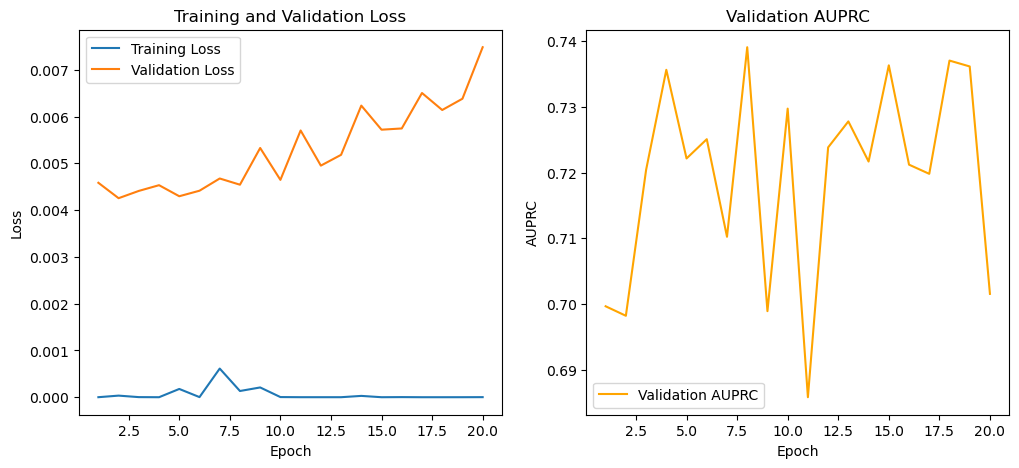

In [161]:
import time
start_time = time.time()
nn_classifier.fit(X_train, y_train)
end_time= time.time()

In [162]:
elapsed_time = end_time - start_time
print(f"Neural Network model took {elapsed_time:.5f} seconds ({elapsed_time/60:.2f} minutes) to run.")

NN model took 213.68009 seconds (3.56 minutes) to run.


**Epoch Analysis for Training and Validation Sets with Emphasis on Loss Functions and AUPRC Metric**
1. **Objective:**
   - Examine the behavior of the validation set independently and in tandem with the training set for each epoch.

2. **Ideal Scenario:**
   - Desire a simultaneous decrease in loss functions for both the validation and training sets with each epoch.
   - Prefer both loss functions to move in the same direction, signifying a joint reduction.
   - If the loss decreases for the training set but not for the validation set, it suggests overfitting.

3. **AUPRC Metric Analysis:**
   - Observe the AUPRC (Area Under the Precision-Recall Curve) metric for the validation set, illustrated in the right figure.
   - After approximately the 7th epoch, there is not a substantial increase in the metric.

4. **Conclusion:**
   - Based on visual analysis, an epoch around 7 is identified as the optimum choice.

In [190]:
y_pred3_epoch20=nn_classifier.predict(X_test)

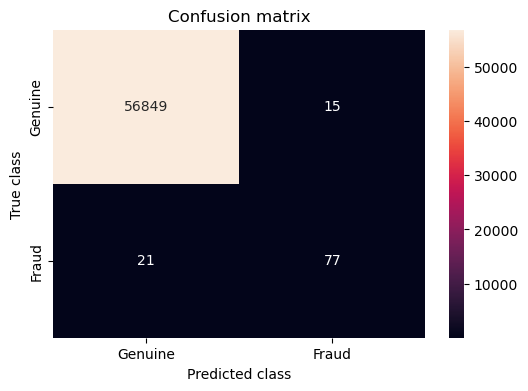

In [169]:
 plot_confusion_matrix(y_true=y_test, y_pred=y_pred3_epoch20, labels=LABELS)

In [170]:
print('AUPRC score: {}'. format(metrics.average_precision_score(y_test, y_pred3_epoch20)))
print('AUROC score: {}'.format(metrics.roc_auc_score(y_test, y_pred3_epoch20)))
print('Accuracy score: {}'.format(metrics.accuracy_score(y_test, y_pred3_epoch20)))
print(metrics.classification_report(y_test,y_pred3_epoch20))

AUPRC score: 0.6579773624826926
AUROC score: 0.8927252492161748
Accuracy score: 0.9993679997191109
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.79      0.81        98

    accuracy                           1.00     56962
   macro avg       0.92      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962



# 8. Majority Voting

A Voting Classifier is an ensemble learning method in scikit-learn that combines the predictions of multiple individual classifiers to make a final prediction. It allows you to combine the strengths of different base classifiers, potentially improving overall predictive performance.

Voting Classifier 

Epoch [0/20], Validation Loss: 0.7740, AUPRC : 0.0908
Epoch [1/20], Validation Loss: 0.7740, AUPRC : 0.0908
Epoch [2/20], Validation Loss: 0.7740, AUPRC : 0.0908
Epoch [3/20], Validation Loss: 0.7740, AUPRC : 0.0908
Epoch [4/20], Validation Loss: 0.7740, AUPRC : 0.0908
Epoch [5/20], Validation Loss: 0.7740, AUPRC : 0.0908
Epoch [6/20], Validation Loss: 0.7740, AUPRC : 0.0908
Epoch [7/20], Validation Loss: 0.7740, AUPRC : 0.0908
Epoch [8/20], Validation Loss: 0.7740, AUPRC : 0.0908
Epoch [9/20], Validation Loss: 0.7740, AUPRC : 0.0908
Epoch [10/20], Validation Loss: 0.7740, AUPRC : 0.0908
Epoch [11/20], Validation Loss: 0.7740, AUPRC : 0.0908
Epoch [12/20], Validation Loss: 0.7740, AUPRC : 0.0908
Epoch [13/20], Validation Loss: 0.7740, AUPRC : 0.0908
Epoch [14/20], Validation Loss: 0.7740, AUPRC : 0.0908
Epoch [15/20], Validation Loss: 0.7740, AUPRC : 0.0908
Epoch [16/20], Validation Loss: 0.7740, AUPRC : 0.0908
Epoch [17/20], Validation Loss: 0.7740, AUPRC : 0.0908
Epoch [18/20], Valid

VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=10,
                                                     random_state=0)),
                             ('NN',
                              NeuralNetworkClassifier(epochs=20,
                                                      loss_func=BCELoss(),
                                                      model=Classifier(
  (extractor1): Linear(in_features=30, out_features=21, bias=True)
  (extractor2): Linear(in_features=21, out_features=21, bias=True)
  (relu): ReLU()
  (drop_out): Dropout(p=0.32, inplace=False)
  (classifier): Linear(in_features=21, out_features=1, bias=True)
),
                                                      opt=Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
 

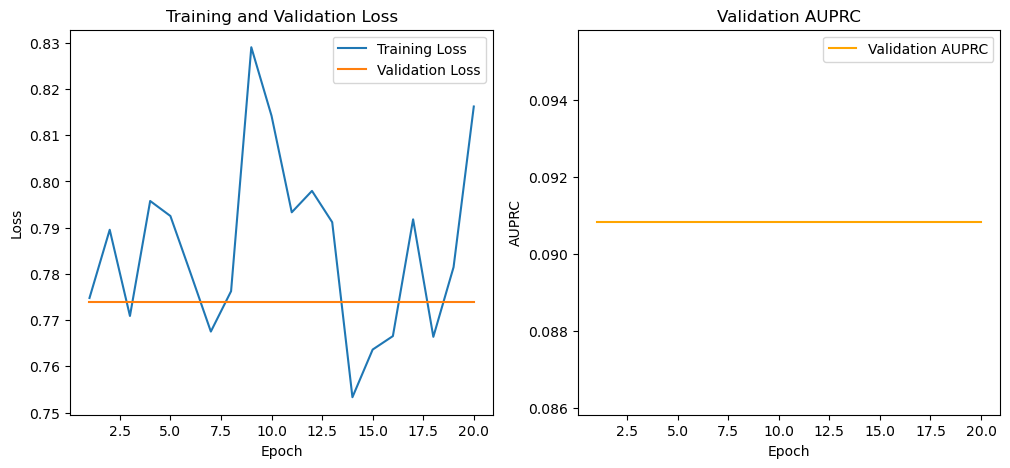

In [187]:
from sklearn.ensemble import VotingClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
ensemble_model = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('NN', nn_classifier),
    ('knn', knn_classifier)
], voting='soft') 

ensemble_model.fit(X_train, y_train)

In [182]:
# Make predictions on the test set
y_pred = ensemble_model.predict(X_test)

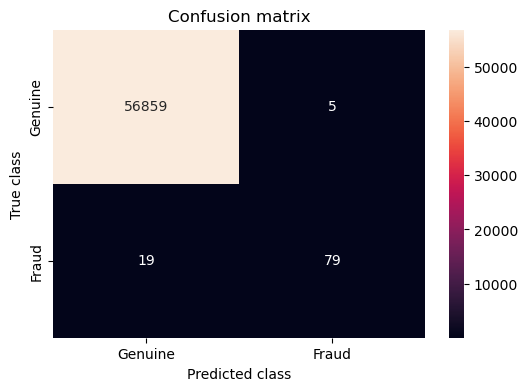

In [185]:
 plot_confusion_matrix(y_true=y_test, y_pred=y_pred, labels=LABELS)

In [186]:
print('AUPRC score: {}'. format(metrics.average_precision_score(y_test, y_pred)))
print('AUROC score: {}'.format(metrics.roc_auc_score(y_test, y_pred)))
print('Accuracy score: {}'.format(metrics.accuracy_score(y_test, y_pred)))
print(metrics.classification_report(y_test, y_pred))

AUPRC score: 0.7584725255774664
AUROC score: 0.9030172599428067
Accuracy score: 0.9995786664794073
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.81      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



**Lets perform hyperoptimisation to improve our results**

In [208]:
from hyperopt import fmin, tpe, hp, Trials
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Assume you have a dataset X and corresponding labels y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the objective function to minimize
def objective(params):
    # Extract hyperparameters
    rf_n_estimators = int(params['rf_n_estimators'])
    nn_epochs = int(params['nn_epochs'])
    nn_lr = params['nn_lr']
    knn_n_neighbors = int(params['knn_n_neighbors'])

    # Print hyperparameters at each evaluation
    print(f"Eval - Random Forest: {rf_n_estimators}, NN Epochs: {nn_epochs}, NN LR: {nn_lr}, KNN Neighbors: {knn_n_neighbors}")

    # Define your classifiers with the hyperparameters
    random_forest = RandomForestClassifier(n_estimators=rf_n_estimators, random_state=0)
    neural_network = MLPClassifier(max_iter=nn_epochs, learning_rate_init=nn_lr, random_state=0)
    knn_classifier = KNeighborsClassifier(n_neighbors=knn_n_neighbors)

    # Create the Voting Classifier
    voting_classifier = VotingClassifier(estimators=[
        ('random_forest', random_forest),
        ('NN', neural_network),
        ('knn', knn_classifier)
    ], voting='soft')  # 'soft' for soft voting

    # Fit the Voting Classifier on your training data
    voting_classifier.fit(X_train, y_train)

    # Calculate AUPRC on the test set
    auprc = average_precision_score(y_test, voting_classifier.predict_proba(X_test)[:, 1])

    # Print AUPRC at each evaluation
    print(f"AUPRC: {auprc}")

    # Hyperopt minimizes the objective function, so negate AUPRC
    return -auprc

# Define the search space for hyperparameters
space = {
    'rf_n_estimators': hp.quniform('rf_n_estimators', 10, 100, 1),
    'nn_epochs': hp.quniform('nn_epochs', 5, 50, 1),
    'nn_lr': hp.loguniform('nn_lr', -6, 0),  # Assuming lr varies in the range [1e-6, 1]
    'knn_n_neighbors': hp.quniform('knn_n_neighbors', 1, 20, 1)
}

In [ ]:
# Create Trials object to store optimization results
trials = Trials()

# Run hyperopt optimization
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=10, trials=trials)

# Print the best hyperparameters
print("Best Hyperparameters:", best)

Eval - Random Forest: 97, NN Epochs: 15, NN LR: 0.7259475990800627, KNN Neighbors: 20                                  
  0%|                                                                           | 0/10 [00:00<?, ?trial/s, best loss=?]

C:\Users\MANSI\anaconda3\envs\anamoly_detection\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.




In [ ]:
# Define your classifiers with the hyperparameters
random_forest = RandomForestClassifier(criterion='entropy', n_estimators=rf_n_estimators, random_state=0)
neural_network = NeuralNetworkClassifier(epochs=nn_epochs, loss_func=loss_func, model=model, opt=optim.Adam(model.parameters(), lr=nn_lr))
knn_classifier = KNeighborsClassifier(n_neighbors=knn_n_neighbors)

In [ ]:
https://towardsdatascience.com/protecting-your-money-detecting-credit-card-fraud-with-ml-dl-2c4a9b9a0779